# Primitives

#### 1. Palindrome number

In [35]:
# O(n) since the entire number is iterated

def isPalindrome(x):
        '''
        :type x: int
        :rtype: bool
        '''
        y = x
        num = []
        if y > 0:
            while y !=0 :
                num.append(str(int(y%10)))
                y = (y-(y%10))/10
            if int(''.join(num)) == x:
                return True
            else:
                return False
        else :
            return False
        
#print(isPalindrome(124421), isPalindrome(-1), isPalindrome(9))

In [34]:
# O(n/2) since only half of the length is traversed

import math

def isPalindrome2(x):
        '''
        :type x: int
        :rtype: bool
        '''
        if x <=0 :
            return False
        
        total_digits = math.floor(math.log10(x)) + 1
        mask = math.pow(10,total_digits - 1)
        
        for i in range(total_digits//2):
            rd = x//mask
            ld = x%10
            
            if ld != rd:
                return False
            
            x %= mask
            x //= 10
            mask //= 100
        
        return True
        
#print(isPalindrome2(124421), isPalindrome2(-1), isPalindrome2(9))

#### 2. Add two integer strings

In [60]:
# similar to paper based right to left addition, result generated in reverse order

# O(k) solution, where k is longer string

def addStrings(s1, s2):
        '''
        :type s1: str
        :type s2: str
        :rtype: str
        '''
        i = len(s1) - 1
        j = len(s2) - 1
        carry = 0
        result = ''
        while i >= 0 or j >=0:
            sum = 0
            sum += carry
            if i >=0 :
                sum += ord(s1[i]) - ord('0')
                i -= 1
                
            if j >= 0 :
                sum += ord(s2[j]) - ord('0')
                j -= 1
                
            val = sum % 10
            carry = sum // 10  # carry is going be 1st digit of sum value i.e either 0 or 1
            result += str(val)
        if carry != 0:
            result += str(carry)
        return result[::-1]
        
        
#print(addStrings("1234567890","1234567890"))

#### 3. Check if given num is power of 2

In [135]:
import math

# O(1) time

def powerOfTwo(input):
        '''
        :type input: int
        :rtype: bool
        '''
        x = math.log2(input)
        y = math.floor(x)
        
        if x == y :
            return True
        else:
            return False


powerOfTwo(12)

False

#### 4. Shortest time difference

In [128]:
# Convert the times into minutes and sort the array, don't forget to take one backward difference on the clock

# O(nlogn)

def timeDifference(times):
        '''
        :type times: list of str
        :rtype: int
        '''
        minutes = []
        dictt = {}
        for i in times:
            temp = i.split(':')
            val = (int(temp[0])*60) + int(temp[1])
            minutes.append(val)
            dictt[val] = i
            
        minutes.sort()
        
        if len(minutes) == 2:
            return (dictt[minutes[1]],dictt[minutes[0]], minutes[1] - minutes[0])
        time1 = 0
        time2 = 0
        diff = 0
        fwd = 0
        for i in range(len(minutes)-1) : 
            if i == 0:
                diff = minutes[i] + (1440-minutes[-1])
                time1, time2 = minutes[i], minutes[-1]
                
            fwd = minutes[i+1] - minutes[i]
            if fwd < diff:
                diff = fwd
                time1, time2 = minutes[i], minutes[i+1]
            
        return (dictt[time1],dictt[time2], diff)
        

#print(
#        timeDifference(["00:03", "23:59", "12:03"]),
#        timeDifference(["00:01", "00:02"]),
#        timeDifference(["00:00","23:59","00:00"])
#     )    

#### 5. Reverse Bits

In [180]:
#

def reverseBits(input):
        '''
        :type input: int
        :rtype: int
        '''
        powers = []
        while input > 0 :
            power = math.floor(math.log2(input))
            powers.append(power)
            input -= 2**power
        
        binary = 0
        for i in powers:
            binary += 10**i
        
        binary = str(binary)
        rev_num = 0
        
        for i in range(len(binary)):   # no need to reverse the binary since left to right indexing is already reversed
            if binary[i] == '1':       # in regards to binary representation is right to left i.e opposite
                rev_num += 2**i
            
        return rev_num
    

reverseBits(9090)      

4209

# Arrays

#### 1. Rotate (n x n) Matrix

In [3]:

'''
The arrow symbols shows how we are traversing the four pointers (at each corner) which is similar to rotation 90 degree clockwise

      ➡️         
a = [[ 1,  2,  3, 4],⬇️
     [ 5,  6,  7, 8],
     [ 9, 10, 11, 12],
    ⬆️[13, 14, 15, 16]]
                   ⬅️
                   
    We do this layer by layer
'''

# Since it is n x n matrix, we can use traverse the matrix layer by layer, not suitable for m x n matrix!!!!

# O(n^2) solution
# In-place swapping i.e O(1) space

def rotate(matrix):
        '''
        :type matrix: list of list of int
        :rtype: list of list of int
        '''
        
        size = len(matrix[0])  #size of matrix
        boundary = size - 1  #index of boundary row/col
        
        for layer in range(size//2):
            for i in range(layer, boundary - layer):
    
                top_left = matrix[layer][i]
                top_right = matrix[i][boundary - layer]
                bottom_left = matrix[boundary - i][layer]
                bottom_right = matrix[boundary - layer][boundary - i]
                
                matrix[layer][i] = bottom_left
                matrix[i][boundary - layer] = top_left
                matrix[boundary - i][layer] = bottom_right
                matrix[boundary - layer][boundary - i] = top_right
        
        return matrix
                

#### 2. Spiral Traversal of a matrix

In [292]:
'''
Use four boudaries/fences, traverse along top boundary, from right to left, shift the top boundary
Next along right boundary, from top to bottom, shift the right boundary,
repeat from bottom and left boundaries as above

''' 

# O(m * n)

def spiralOrder(matrix):
        '''
        :type matrix: list of list of int
        :rtype: list of int
        '''
        spiral_order = []
        m = len(matrix)  #4
        n = len(matrix[0]) #3
        top = 0
        right = n - 1
        bottom = m - 1
        left = 0
        
        while top <= bottom and left <= right:
            for i in range(left, right + 1):
                spiral_order.append(matrix[top][i])
    
            top += 1
        
            for i in range(top, bottom + 1):
                spiral_order.append(matrix[i][right])
            
            right -= 1
            
            if bottom > top:
                for i in range(right, left-1, -1):
                    spiral_order.append(matrix[bottom][i])
            
                bottom -= 1
            
            if right > left:
                for i in range(bottom, top-1, -1):
                    spiral_order.append(matrix[i][left])
            
                left += 1
            
        return spiral_order
        

#### 3. 3-Sum

In [160]:
# O(n^2) solution

# For these types of problems use hash tables

def threeSum(A,k):
        '''
        :type A: list of int
        :rtype: list of list of int
        '''
        hash_sum = {}
        
        for i in range(len(A)):
            hash_sum[k-A[i]] = i  
            
        triplets = []    
        for i in range(len(A)-1):
            for j in range(i+1, len(A)):
                if A[i] + A[j] in hash_sum and A[i]!=A[j]:
                    third_num = A[hash_sum[A[i]+A[j]]]
                    vals = set()
                    vals.add(A[i])
                    vals.add(A[j])
                    vals.add(third_num)
                    if vals not in triplets and len(vals) == 3:
                        triplets.append(vals)
        
        for i in range(len(triplets)):
            triplets[i] = list(triplets[i])
        
        return triplets
            

#### 4. Sudoku validity check

In [167]:
a = [[5,3,0,0,7,0,0,0,0],
      [6,0,0,1,9,5,0,0,0],
      [0,9,8,0,0,0,0,6,0],
      [8,0,0,0,6,0,0,0,3],
      [4,0,0,8,0,3,0,0,1],
      [7,0,0,0,2,0,0,0,6],
      [0,6,0,0,0,0,2,8,0],
      [0,0,0,4,1,9,0,0,5],
      [0,0,0,0,8,0,0,7,9]]


# O(n^2)

def validSudoku(board):
        '''
        :type board: list of list of int
        :rtype: bool
        '''
        seen = set()
        for i in range(0,9):
            for j in range(0,9):
                v = board[i][j]
                
                if v!= 0 :
                    row = "row{}val{}".format(i,v)
                    col = "col{}val{}".format(j,v)
                    box = "{}{}{}".format(i//3,v,j//3)
                    
                    if row not in seen and col not in seen and box not in seen:
                        seen.add(row)
                        seen.add(col)
                        seen.add(box)
                    
                    else:
                        return False
        return True
                                           

#### 5. Sub-arrays sum equal to k

In [181]:
def countSubarrays(arr, k):
        '''
        :type arr: list of int
        :type k: int
        :rtype: int
        '''
        size = len(arr)
        count = 0
        for offset in range(0,size-1):
            total = 0
            for i in range(offset, size):
                total += arr[i]
                if total == k:
                    count += 1
                    print(arr[offset:i+1])
        return count
                    
        

# Strings

#### 1. Pattern Matching

In [212]:
# O(n^2)

# convert each string in to a sequence of digits then compare

def findAndReplacePattern(words, pattern):
        '''
        :type words: list of str
        :type pattern: str
        :rtype: list of str
        '''
        matched = []
        pattern = get_num_pattern(pattern)
        for i in words:
            word = get_num_pattern(i)
            if word == pattern:
                matched.append(i)
        
        return matched

def get_num_pattern(string):
    temp = ""
    dictt = {}
    num = 0
    for i in string:
        if i not in dictt:
            dictt[i] = str(num)
            num += 1
            temp += dictt[i]
        else:
            temp += dictt[i]
    return temp
        


#### 2. Add two binary strings

In [218]:
# O(n)


import math
def addBinaryStrings(s1, s2):
        '''
        :type s1: str
        :type s2: str
        :rtype: str
        '''
        return to_binary(to_decimal(s1) + to_decimal(s2))

def to_decimal(string):
    rev = string[::-1] 
    num = 0
    for i in range(len(rev)):
        if rev[i] == '1':
            num += 2**i
    return num

def to_binary(num):
    powers = []
    
    while num > 0:
        power = math.floor(math.log2(num))
        powers.append(power)
        num -= 2**power
        
    binary = 0
    for i in powers:
        binary += 10**i
    return str(binary)
        

#### 3. Palindrome string

In [293]:
# O(n/2)

def validPalindrome(s):
        '''
        :type s: str
        :rtype: bool
        '''
        
        s = s.lower()
        print(s)
        
        l = 0
        r = len(s)-1

        while l < r:
            while not s[l].isalnum():   # use WHILE NOT to keep skipping useless characters
                l += 1
            
            while not s[r].isalnum():   # use WHILE NOT to keep skipping useless characters
                r -= 1   
            
            if s[l] != s[r]:
                return False
            else:
                l += 1
                r -= 1
        
        return True


#### 4. Zig Zag conversion of string

In [330]:
# O(n)

# Increasing then decreasing row numbers along the string gives the zig zag output


def zigzag(s, rows):
        '''
        :type s: str
        :type rows: int
        :rtype: str
        '''
        if rows == 1:
            return s
        
        arr = [""]*rows     #list of n strings
        direction = -1
        i = 0

        for char in s:
            arr[i] += char
            
            if i == 0 or i == rows - 1:     #flipping of direction happens only in the start or end row
                direction = -(direction)     # for first iteration rows increased, to adjust this initialize direction appropriately
            
            if direction == 1:
                i += 1
            else:
                i-= 1
                 
        print(arr)
        return ''.join(arr)                 

#### 5. Longest Palindrome Construction


In [338]:
# O(n) solution


def longestPalindrome(s):
        '''
        :type s: str
        :rtype: int
        '''
        count = {}
        length = 0
        flag = 0
        
        for i in s:
            count[i] = count.get(i, 0) + 1
                        
        for each in count:
            if count[each] % 2 == 0:
                length += count[each]
            else:
                if count[each] > 1:
                    if len(count) == 1:
                        return count[each]
                    length += (count[each] - 1)
                    
                else:
                    if flag == 0 : 
                        length += 1
                        flag = 1
        return length
    
#longestPalindrome("aabbc")        
#longestPalindrome("abbcccd")
longestPalindrome("cC")

1

#### 6. Replace words with Prefix

In [370]:
# O(n^2)

def replaceWordsWithPrefix(prefixes, sentence):
        '''
        :type prefixes: list of str
        :type sentence: str
        :rtype: str
        '''
        mapping = {}
        for i in prefixes:
            mapping[i] = True
            
        line = sentence.split()
        
        for index in range(len(line)):
            word = line[index]
            for i in range(len(word)):
                if word[0:i] in mapping:
                    line[index] = word[0:i]
                    break
        return ' '.join(line)
                
        


#### 7. Word subsets

In [410]:
def wordSubsets(A, B):
        '''
        :type A: list of str
        :type B: list of str
        :rtype: list of str
        '''
        map_b = {}
        for i in B:
            temp = mapping(i)
            for each in temp:
                if map_b.get(each,0) < temp[each]:
                    map_b[each] = temp[each]
                    
        print(map_b)   
        for word in A:
            temp_map = mapping(word)
            add = 1
            for char in map_b:
                if temp_map.get(char,0) < map_b[char]:
                    add = 0
                    break
            if add == 1:
                print(word)
                
        
def mapping(string):
    mapp = {}
    for i in string:
        mapp[i] = mapp.get(i,0) + 1
    return mapp
        
        
#wordSubsets(["orange", "room", "more"], ["rm", "oo"])
wordSubsets(['world','warrior', 'war'],['wo','r','a','wrr'])

{'w': 1, 'o': 1, 'r': 2, 'a': 1}
warrior


#### 8. Group together Anagrams

In [415]:
# O(n^2)

# Set method works only if each string has non-repeating characters, else Map/Couting method can be used

def groupAnagrams(words):
        '''
        :type words: list of str
        :rtype: list of list of str
        '''
        
        anagrams = []
        
        for i in words:
            if set(i) not in anagrams:
                anagrams.append(set(i))
                
        groups = []
        for each in anagrams:
            temp = []
            for i in words:
                if each == set(i):
                    temp.append(i)
            groups.append(temp)
                
        print(groups)



#### 9. Longest substring without repeating characters

In [441]:
# O(n) since only length is asked

def longestUniqueCharacterSubstring(s):
        '''
        :type s: str
        :rtype: int
        '''
        if s == "" :
            return 0
        
        temp = set()
        length = 0
        
        for i in s:
            if i not in temp:
                temp.add(i)
                if len(temp) > length:
                    length = len(temp)
            else:   
                temp = set()
        
        return length
        


# Stacks and Queues

#### 1. Balanced Parantheses

In [460]:
# O(n)

def isValid(s):
        '''
        :type s: str
        :rtype: bool
        '''
        stack = []
        for i in s:
            if i == '(' or i == '[' or i == '{':
                stack.append(i)
            else:
                if stack == [] or (i == ')' and stack[-1]!='(') or (i == ']' and stack[-1]!='[') or (i == '}' and stack[-1]!='{') :
                    return False
                else:
                    stack.pop()
        
        if stack != []:
            return False
        else:
            return True
        

#### 2. Compute Buildings With A Sunset View

In [464]:
def getBuildingsWithAView(buildings):
        '''
        :type buildings: list of int
        :rtype: list of int
        '''
        
        result = [0]
        tall = buildings[0]
        for i in range(1,len(buildings)):
            if buildings[i] > tall:
                result.append(i)
                tall = buildings[i]
        return result
        

#### 3. Undo Redo Actions

In [488]:
def performEditorActions(actions):
        '''
        :type actions: list of list of str
        :rtype: str
        '''
        mapp = {'INSERT':1, 'DELETE':2, 'UNDO':3, 'REDO':4}
        acts = []
        undo = []
        for i in actions:
            val = mapp[i[0]]
            if val == 1 or val == 2:
                acts.append(i)
            if val == 3:
                temp = acts.pop()
                undo.append(temp)
            if val == 4 and undo != []:
                acts.append(undo.pop())
        
        string = []
        for i in acts:
            val = mapp[i[0]]
            if val == 1:
                string.append(i[1])
            else:
                string.pop()
        return ''.join(string)
           

            
performEditorActions([["INSERT","a"],["INSERT","b"],['UNDO'],['REDO'],['REDO']])


'ab'

# Linked Lists

##### Designing a linked list

In [2]:
class Node():
    def __init__(self, val):
        self.val = val      #type Data
        self.next = None    #type Node

In [3]:
class ll():
    def __init__(self):
        self.head = None    #type Node
        self.size = 0
        
    def add_at_head(self,val):
        new_node = Node(val)
        new_node.next = self.head
        self.head = new_node
        self.size += 1
        
    def add_at_index(self,index,val):
        if index == 0 or self.size == 0:
            self.add_at_head(val) #size increment included in any ADD function, thus increment not needed
        else:
            new_node = Node(val)
            temp = self.head
            for i in range(index-1):
                temp = temp.next
            new_node.next = temp.next
            temp.next = new_node
            self.size += 1
            
    def delete_at_index(self,index):
        prev = None
        curr = self.head
        if index >=2 :
            for i in range(index-1):
                prev = curr
                curr = curr.next
            prev.next = curr.next #we are deleting the CURR node, which is present at the given index
        else:
            self.head = curr.next
        self.size -= 1
        
    def get_val(self,index):
        temp = self.head
        for i in range(index-1):
            temp = temp.next
        return(temp.val)    
        
    def view(self):
        if self.size == 0 :
            print('List empty')
        else:
            temp = self.head
            while temp != None:
                print(temp.val,'-->',end='')
                temp = temp.next
            print(temp, '   size:',self.size)
    
                

In [40]:
a = ll()
a.add_at_head(2)
a.add_at_head(4)
a.add_at_head(5)
a.view()

a.add_at_index(2,1)
a.view()

a.add_at_index(a.size, 0)
a.view()

a.add_at_index(0, -3)
a.view()

a.delete_at_index(a.size)
a.view()

a.head.val

5 -->4 -->2 -->None    size: 3
5 -->4 -->1 -->2 -->None    size: 4
5 -->4 -->1 -->2 -->0 -->None    size: 5
-3 -->5 -->4 -->1 -->2 -->0 -->None    size: 6
-3 -->5 -->4 -->1 -->2 -->None    size: 5


-3

#### 1. Even Odd Partition

In [41]:
class solution:
            
    def oddEvenList(self,head):
        even_dummy = Node(-1)
        even_ptr = even_dummy
        odd_dummy = Node(-1)
        odd_ptr = odd_dummy
        curr = head
        index = 0
        while curr != None:
            if index%2 == 0:
                even_ptr.next = curr
                even_ptr = even_ptr.next
            else:
                odd_ptr.next = curr
                odd_ptr = odd_ptr.next
            index += 1
            curr = curr.next
        even_ptr.next = odd_dummy.next
        odd_ptr.next = None
        return even_dummy.next
        

        
b = solution()
b.oddEvenList(a.head)
a.view()

-3 -->4 -->2 -->5 -->1 -->None    size: 5


#### 2. Overlapping Linked List / Intersection

In [42]:
c = ll()
c.add_at_head(8)
c.add_at_head(6)
c.add_at_head(4)
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()

1 -->2 -->3 -->4 -->6 -->8 -->None    size: 6


In [43]:
d = ll()
d.add_at_head(13)
d.add_at_head(12)
d.head.next.next = c.head.next.next.next.next
d.view()
c.view()

12 -->13 -->6 -->8 -->None    size: 2
1 -->2 -->3 -->4 -->6 -->8 -->None    size: 6


In [44]:
# Method 1 : using a set of unique memory addresses

def intersect1(list1,list2):
    ptr1 = list1.head
    ptr2 = list2.head
    nodes1 = set()
    while ptr1 != None:
        nodes1.add(ptr1)
        ptr1 = ptr1.next
    
    while ptr2 != None:
        if ptr2 in nodes1:
            return ptr2.val
        ptr2 = ptr2.next
        
intersect1(d,c)

6

In [45]:
# Method 2 : Using two pointers and given length of both lists

def intersect2(list1,list2,m,n):
    ptr1 = list1.head
    ptr2 = list2.head
    if m > n:
        for i in range(m-n):
            ptr1 = ptr1.next
    else:
        for i in range(n-m):
            ptr2 = ptr2.next
    
    while ptr1!= None : 
        if ptr1 == ptr2 :
            return ptr1.val
        ptr1 = ptr1.next
        ptr2 = ptr2.next
    return None
    
intersect2(d,c,4,6)

6

#### 3. Remove kth to last element

In [75]:
c = ll()
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()

class Solution:
    def removeKthToLast(self, head, k):
        '''
        :type head: ListNode
        :type k: int
        :rtype: ListNode
        '''
        forw = head
        curr = head    #node to be deleted
        temp = None
        
        for i in range(k-1):
            forw = forw.next
        
        if forw.next == None:
            head = curr.next
            return head
            
        while forw.next!= None:
            temp = curr
            curr = curr.next
            forw = forw.next
        temp.next = curr.next
           
        
        return curr.val
        
sol = Solution()
sol.removeKthToLast(c.head, 3)
#c.view()

1 -->2 -->3 -->None    size: 3


2

#### 4. Right shift a singly linked list by k steps

In [114]:
c = ll()
c.add_at_head(4)
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()


class Solution:
    def rotateRight(self, head, k):
        '''
        :type head: ListNode
        :type k: int
        :rtype: ListNode
        '''
        temp = head
        curr = head
        forw = head
        new_head = None
        for i in range(k):
            forw = forw.next
            
        if forw == None:    # NOT forw.next since k-1 not used above
            return head
        
        while forw.next != None:
            forw = forw.next
            curr = curr.next
            
        new_head = curr.next
        head = new_head
        forw.next = temp
        curr.next = None
        return head.val
            
        
sol = Solution()
sol.rotateRight(c.head, 2)

1 -->2 -->3 -->4 -->None    size: 4


3

#### 5. Add 2 integers represented as Linked List

In [143]:
c = ll()
c.add_at_head(4)
c.add_at_head(9)
c.add_at_head(2)
c.add_at_head(1)
c.view()

d = ll()
d.add_at_head(3)
d.add_at_head(2)
d.add_at_head(1)
d.view()

class Solution:
    def addTwoNumbers(self, l1, l2):
        '''
        :type l1: ListNode
        :type l2: ListNode
        :rtype: ListNode
        '''
        ptr1 = l1
        ptr2 = l2
        dummy = Node(0)
        ptr3 = dummy
        carry = 0
        while (ptr1!= None or ptr2!= None):
            first = ptr1.val if ptr1!= None else 0
            second = ptr2.val if ptr2!= None else 0
            
            total = carry + first + second
            carry = total // 10
            
            ptr3.next = Node(total%10)
            
            if ptr1 != None : ptr1 = ptr1.next
            if ptr2 != None : ptr2 = ptr2.next
            ptr3 = ptr3.next

            
        if carry != 0:
            ptr3.next = Node(carry)
            
        head = dummy.next
        return head.next.next.next.val
        
        
sol = Solution()
sol.addTwoNumbers(c.head,d.head)

1 -->2 -->9 -->4 -->None    size: 4
1 -->2 -->3 -->None    size: 3


5

#### 6. Testing for Cycles

In [144]:
class Solution:
    def hasCycle(self, head):
        '''
        :type head: ListNode
        :rtype: bool
        '''
        addresses = set()
        ptr = head

        while ptr != None:
            if ptr not in addresses:
                addresses.add(ptr)
            else:
                return True
            ptr = ptr.next

        if ptr == None:
            return False

#### 7. Swap linked list nodes in pairs

In [156]:
# Exchanging only values
class Solution:
    def swapInPairs(self, head):
        '''
        :type head: ListNode
        :rtype: ListNode
        '''
        curr = head

        while curr!=None and curr.next!=None:
            temp = curr.val
            curr.val = curr.next.val
            curr.next.val = temp
            
            curr = curr.next.next
            
        

    
c = ll()
c.add_at_head(7)
c.add_at_head(6)
c.add_at_head(5)
c.add_at_head(4)
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()

sol = Solution()
sol.swapInPairs(c.head)
c.view()



1 -->2 -->3 -->4 -->5 -->6 -->7 -->None    size: 7
2 -->1 -->4 -->3 -->6 -->5 -->7 -->None    size: 7


In [178]:
# Exchanging addresses and values
class Solution:
    def swapInPairs(self, head):
        '''
        :type head: ListNode
        :rtype: ListNode
        '''
        curr = head
        fwd = curr.next
        head = fwd
        temp = None

        while True:
            temp = fwd.next
            fwd.next = curr
            
            if temp == None or temp.next == None:
                curr.next = temp
                return head
            
            curr.next = temp.next #changing over next segment only when confirming its not None or last node
            curr = temp
            fwd = temp.next
            
        

    
c = ll()
c.add_at_head(7)
c.add_at_head(6)
c.add_at_head(5)
c.add_at_head(4)
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()

sol = Solution()
sol.swapInPairs(c.head)
#c.view()

1 -->2 -->3 -->4 -->5 -->6 -->7 -->None    size: 7


#### 8. Clone a LL with Random Pointers

In [184]:
# Using a Hashtable of memory addresses i.e Keys as old nodes and values as new nodes (with pointers 
# to other nodes in values)
import collections
class Node:
    def __init__(self,val,next,random):
        self.val = val
        self.next = next
        self.random = random

class Solution:
    def copyRandomList(self, head):
        dictt = collections.defaultdict(lambda: Node(0,None,None))
        curr = head
        dictt[None] = None
        
        while curr:
            dictt[curr].val = curr.val
            dictt[curr].next = dictt[curr.next]
            dictt[curr].random = dictt[curr.random]
            curr = curr.next
            
        return dictt[head]

# Recursion

In [54]:
# Counting vowels

def is_vowel(char):
    v = 'aeiou'
    if char.lower() in v:
        return 1
    else:
        return 0

def count1(string):
    if len(string) == 0:
        return 0
    else:
        return count(string[:len(string)-1]) + is_vowel(string[-1])
    
def count2(string,n):
    if n == 1:
        return is_vowel(string[0])
    else:
        return count(string,n-1) + is_vowel(string[n-1])
                                        
count1('tyeds')
                                            

1

In [55]:
#Pascal's Triangle

def triangle(num):
    if num == 0:
        return [1]
    else:
        line = [1]
        previous = triangle(num-1)
        
        for i in range(len(previous)-1):
            line.append(previous[i] + previous[i+1])
            
        line += [1]
        
        return line


triangle(5)

[1, 5, 10, 10, 5, 1]

In [75]:
# Square of a number

def square(n):
    if n == 1:
        return 1
    else:
        return (square(n-1) + 2*n - 1)
square(4)

16

In [94]:
# Find index of first occurence of a number in an array

def find(arr,num,i):
    if arr == []:
        return 'Not found'
    if arr[0] == num:
        return i
    else:
        return find(arr[1:],num,i+1)
    
find([3,5,6,7],7,0)

3

In [109]:
# Fibonacci

def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return (fib(n-2)+fib(n-1))
    
fib(7)

13

In [142]:
# GCD

def gcd(m,n):
    if m == n:
        return m
    else:
        if m > n:
            return gcd(m-n,n)
        else:
            return gcd(m,n-m)
        
gcd(12,6)

6

# Searching

#### Binary Search

In [5]:
def binary_search(data,num):
    l = 0
    r = len(data)-1
    
    while l <= r:
        mid = (l+r)//2
        
        if data[mid] == num:
            return print(num,'found at :',mid)
        
        if data[mid] > num:
            r = mid - 1    #prune right side to reduce search space
            
        else:
            l = mid + 1    #prune left side to reduce search space
            
    return print('Not found!')

binary_search([1,4,6,9,12,22,43,55], 3)
binary_search([1,4,6,9,12,22,43,55], 22)

Not found!
22 found at : 5


#### 1. Find Closest Number

In [82]:
# O(logn) , O(1)

def find_closest_num(A, target):
    left = 0
    right = len(A) - 1
    closest_num = None

    while left <= right:
        
        mid = (left + right)//2
        diff_left = abs(A[left] - target)
        diff_right = abs(A[right] - target)
        diff_mid = abs(A[mid] - target)

        if diff_left < diff_right and diff_left < diff_mid:
            closest_num = A[left]
            right = mid - 1

        elif diff_right < diff_left and diff_right < diff_mid:
            closest_num = A[right]
            left = mid + 1

        else:
            if mid > 0 and mid < len(A)-1:  # this IF block is to handle below 2 
                if A[mid+1] == target:      # edge cases i.e when repeating numbers are
                    return A[mid+1]        # next to MID
                if A[mid-1] == target : 
                    return A[mid-1]
            else:
                return A[mid]      #this was tricky, as when mid is less than both sides
                               #or target == mid, we will return mid
    return closest_num


print(find_closest_num([2, 5, 6, 7, 8, 8, 9], 8))    #edge case
print(find_closest_num([1, 2, 4, 5, 6, 6, 8, 9], 6)) #edge case
print(find_closest_num([1, 2, 2, 4, 8, 8, 9], 2))
print(find_closest_num([1, 2, 2, 4, 8, 8, 9], 8))
print(find_closest_num([1, 2, 2, 4, 8, 8, 9],11))

8
6
2
8
9


#### 2. Find fixed point

In [91]:
# O(logn), O(1)

def find(A):
    left = 0
    right = len(A) - 1
    
    while left <= right :
        mid = (left + right)//2
# We don't need to check for L or R bcz the conditions and traversal are dependent on mid        
        if A[mid] < mid :  
            left = mid + 1
        elif A[mid] > mid:
            right = mid - 1
        else:
            return mid   # A[mid] == mid
    
    return None

print(find([-10, -5, 0, 3, 7]))
print(find([0, 2, 5, 8, 17]))
print(find([-10, -5, 3, 4, 7, 9]))


3
0
None


#### 3. Find peak in Bitonically sorted array

In [104]:
# O(logn), O(1)

def find(A):
    l = 0
    r = len(A) - 1
    
    while l <= r:
        mid = (l+r)//2
        
        # to handle edge case of simple sorted array in ASC or DES order
        if mid == 0 or mid == len(A)-1:
            return A[mid]
        
        if A[mid-1] < A[mid] and A[mid+1] < A[mid]:
            return A[mid]
        if A[mid+1] > A[mid]:
            l = mid+1
        else:
            r = mid-1
            
print(find([1, 2, 3, 4, 5, 4, 3, 2, 1]))
print(find([1, 6, 5, 4, 3, 2, 1]))
print(find([1, 2, 3, 4, 5]))
print(find([5, 4, 3, 2, 1]))


5
6
5
5


#### 4. Find First Entry in List with Duplicates

In [121]:
# O(logn), O(1)

def find(A,num):
    l = 0
    r = len(A) - 1
    
    while l <= r:
        mid = (l+r)//2
        
        if A[mid] > num:
            r = mid - 1
        elif A[mid] < num:
            l = mid + 1
        else:
            if A[mid-1] == num:
        #pruning all the NUMs occuring on right side of repeating sequence        
                r = mid - 1     
            else:
                return mid
            
    return 'Not found!'

print(find([-14, -10, 2, 108, 108, 243, 285, 285, 285, 401], 285))
print(find([-14, -10, 2, 108, 108, 108, 108, 243, 285, 285, 285, 401], 108))
print(find([-14, -14, -10, 2, 108, 108, 243, 285, 285, 285, 401], -14))

6
3
0


In [125]:
# Use it only when applying Binary search IS NOT modified according to the question
# OR     when using it's just a sub-problem of an original given question
import bisect

print(bisect.bisect_left([-14, -10, 2, 108, 108, 243, 285, 285, 285, 401], 285))
print(bisect.bisect_left([-14, -10, 2, 108, 108, 243, 285, 285, 285, 401], 2))

print(bisect.bisect_right([-14, -10, 2, 108, 108, 243, 285, 285, 285, 401], 285))
print(bisect.bisect([-14, -10, 2, 108, 108, 243, 285, 285, 285, 401], 285))


6
2
9
9


#### 5. Find a number whose square <= given number

In [173]:
# O(logn)

def get_closest(num):
    l = 1
    r = num
    m = 0
    while True:
r        if r - l == 1:
            return l
        m = (l+r)//2
        if m**2 > num:
            r = m
        elif m**2 < num:
            l = m
        else:
            return m
    
get_closest(300)

1 0 300
1 150 150
1 75 75
1 38 38
1 19 19
10 10 19
14 14 19
16 16 19
17 17 19
17 18 18


17

#### 6. Find smallest element in a Cyclically Sorted array

In [192]:
# O(logn)

def find(A):
    l = 0
    r = len(A) - 1
    
    while l != r:
        mid = (l+r)//2

        if A[r] < A[mid]:    # the smallest element occurs towards the right
            l = mid + 1      # thus prune the left side upto MID
        else:
            r = mid          # the smallest element DEFINITELY NOT occurs on RHS AFTER MID, prune AFTER MID
            
    return l        # returning the lower value which occurs on the left of a sorted array
            
find([3, 4, 5, 6, 7, 1, 2])

5

# Graphs

In [214]:
from collections import defaultdict
import networkx as nx

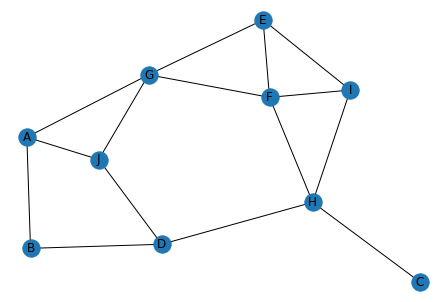

In [218]:
g1 = defaultdict(list)
g1 = {
  'A' : ['B','J','G'],
  'B' : ['A','D'],
  'C' : ['H'],
  'D' : ['B','J','H'],
  'E' : ['F','G','I'],
  'F' : ['G','E','I','H'],
  'G' : ['A','J','F','E'],
  'H' : ['D','F','I','C'],
  'I' : ['E','F','H'],
  'J' : ['A','D','G']
}
G1 = nx.Graph(g1)
nx.draw(G1, with_labels = True)

#### BFS

In [231]:
def bfs(graph, source):
    q = []
    visited = set()
    result = []
    
    q.append(source)
    visited.add(source)
    
    while q:
        curr = q.pop(0)
        result.append(curr)
        
        for adj in graph[curr]:
            if adj not in visited:
                q.append(adj)
                visited.add(adj)
                
    return result

bfs(g1, 'A')

['A', 'B', 'J', 'G', 'D', 'F', 'E', 'H', 'I', 'C']

#### DFS

In [233]:
def dfs(graph, source):
    stack = []
    visited = set()
    result = []
    
    stack.append(source)
    visited.add(source)
    
    while stack:
        curr = stack.pop()
        result.append(curr)
        
        for adj in graph[curr]:
            if adj not in visited:
                stack.append(adj)
                visited.add(adj)
                
    return result

dfs(g1, 'A')

['A', 'G', 'E', 'I', 'H', 'C', 'D', 'F', 'J', 'B']

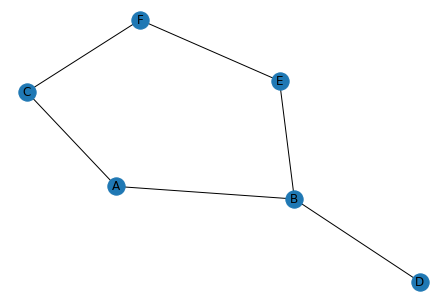

In [226]:
g2 = defaultdict(list)
g2 = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}
G2 = nx.Graph(g2)
nx.draw(G2, with_labels = True)

In [234]:
print(bfs(g2, 'A'))
print(dfs(g2, 'A'))

['A', 'B', 'C', 'D', 'E', 'F']
['A', 'C', 'F', 'B', 'E', 'D']
